## check predicted results

In [2]:
import os
import json
import random
random.seed(1)
from IPython.display import display
from PIL import Image

In [3]:
IMG_PATH = "/mnt/d/Downloads/train_images"
VAL_JSON = "/mnt/d/Downloads/train_images/TextVQA_0.5.1_val.json"

#IMG_PATH = os.getenv('TVQA_IMG_PATH')
#VAL_JSON = os.getenv('TVQA_VAL_JSON')

baseline_pred = '../snap/textvqa_m4c_28662719/reports/textvqa_run_val_2021-02-28T16:21:14.json'

In [21]:
def prepare_qid_info_map(tvqa_data):
    return {i['question_id']:i for i in tvqa_data['data']}

def check_ans(d, td):
    
    ans = d["answer"].replace(" 's'","'s'")
    s = set(td["answers"])
    if ans in s:
        return True
    return False

baseline_data = json.load(open(baseline_pred))
tvqa_val_data = json.load(open(VAL_JSON))
val_qid_info_map = prepare_qid_info_map(tvqa_val_data)

baseline_data = [x for x in baseline_data if not check_ans(x,val_qid_info_map[x["question_id"]])]

In [22]:
baseline_data[0]

{'question_id': 35646,
 'image_id': 'e1ad82ad7b00d0dc',
 'answer': 'the #socialme of the dragon nonprofit',
 'pred_source': ['VOCAB', 'OCR', 'VOCAB', 'VOCAB', 'VOCAB', 'OCR']}

In [33]:
# randomly choose examples
#pred_info = random.choice(baseline_data)
pred_info = baseline_data[45]

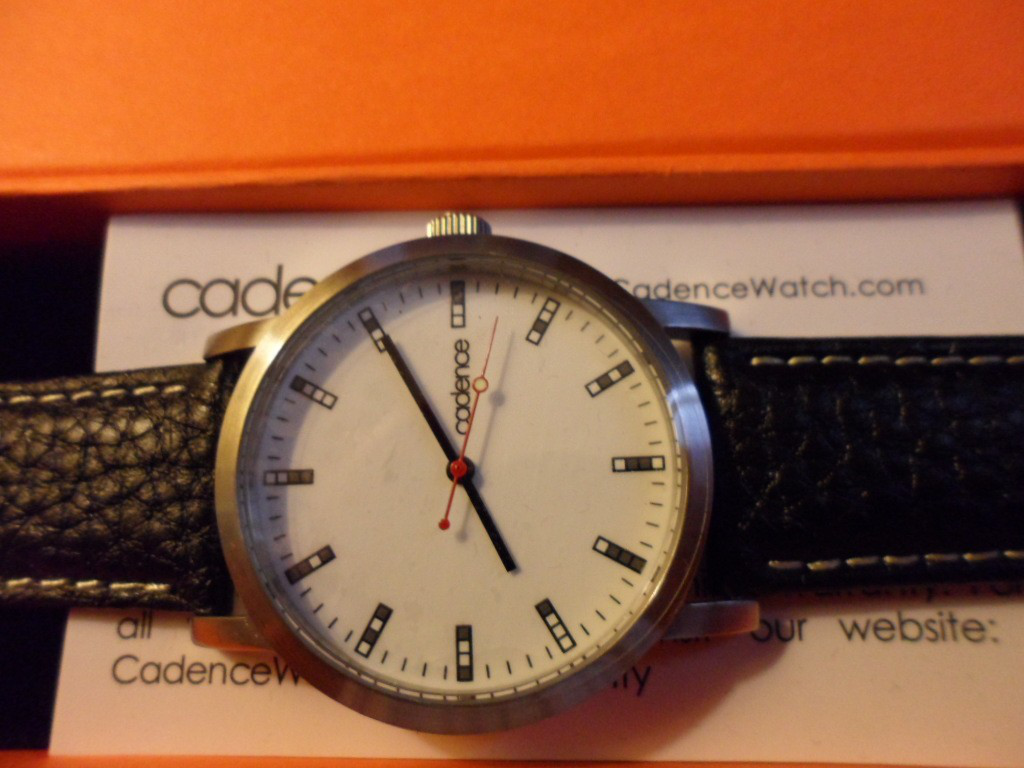

Question: what is the brand of this watch?
Ground truth: ['cadence', 'cadence', 'cadence', 'cadencse', 'codence', 'cadenoe', 'cadence', 'aadenone', 'codence', 'cadence']
Prediction: cade
Prediction source: ['OCR']


In [34]:
# visualize
gt_info = val_qid_info_map[pred_info['question_id']]
pred_im_path = os.path.join(IMG_PATH, '{}.jpg'.format(gt_info['image_id']))

display(Image.open(pred_im_path))
print('Question: {}'.format(gt_info['question']))
print('Ground truth: {}'.format(gt_info['answers']))
print('Prediction: {}'.format(pred_info['answer']))
print('Prediction source: {}'.format(pred_info['pred_source']))